In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [1]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [7]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [1]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import create_dateTime
# from dataset_analysis import conversion_timestamp_to_unixtime
# from dataset_analysis import remove_rw_column
# from dataset_analysis import remove_rw_column_1 #use it if needed
from dataset_analysis import distinct_month_1, draw_month, create_month
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
# from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
# from dataset_analysis import drop_zero_value_row_of_target_signal

# from dataset_analysis import check_A_B_blast_furnace
# from dataset_analysis import no_zero_value_in_target

from dataset_analysis import check_A_B_blast_furnace_1, no_zero_value_in_target_1

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [2]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [90]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
filepath_server = config['DEFAULT']['file_path_server']
feb_march_file = config['DEFAULT']['feb_march_file']

start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
# print(type(correlation_threshold_min_value))
print(required_number_of_test_data)
print(feb_march_file)

500
/home/atif/feb_march_1.csv


In [4]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [5]:
initial_dataframe = create_dataframe(filepath_server)

In [5]:
initial_dataframe.head(1)

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1565853000000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.09664,0.671974,33.111827


In [12]:
print(initial_dataframe.shape)
print(df_1.shape)
print(specific_month_df.shape)

(186100, 4239)
(186100, 4239)
(40222, 4240)


In [6]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [11]:
temp_frame.to_csv('june_july_1.csv')

In [12]:
read = create_dataframe('june_july_1.csv')

In [14]:
# read.columns.get_loc('Unnamed: 0')

In [12]:
# read_1 = read.drop(read.columns[0], axis=1)

In [7]:
# read_1.tail(2)

In [15]:
df_1 = create_dateTime(read,'row_ID','Unnamed: 0')
# df_1 = create_dateTime(read_1)

In [10]:
df_1.head(3)

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
20581,63.552480,31.110530,94.307379,50.509217,74.625144,97.904214,98.714925,39.478675,90.185982,91.401177,...,72.800988,46.863453,41.806998,81.099474,74.344044,65.324862,66.765616,0.758311,8.607081,2019-07-31 23:58:00
20582,64.013841,7.504484,93.784840,19.853774,74.625144,98.569436,99.216861,21.500909,89.721406,100.000000,...,72.058612,49.626922,41.781509,81.060213,75.008290,66.232780,67.660478,0.708359,7.418061,2019-07-31 23:57:00
20583,64.013841,7.170660,93.965836,7.794183,74.163783,98.569436,99.035437,17.845233,89.256830,100.000000,...,72.479000,50.832349,41.810974,81.363225,75.888346,66.446982,66.153466,0.715727,8.232385,2019-07-31 23:56:00


In [ ]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [16]:
date_df, month_array_df = create_month(df_1, 'month')

In [13]:
# for i in specific_month_df['month']:
#     print(i)

In [20]:
def specific_month_df(dataframe,target_column_month):
    req_data_month=dataframe.loc[(dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)]
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
    req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
    return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [21]:
def drop_month_year(dataframe):
#     dataframe = dataframe.drop(['year','month'], axis=1)
    dataframe = dataframe.reset_index()
    return dataframe

# spec_month = drop_month_year(date_df)
spec_month = drop_month_year(specific_month_df)

In [25]:
spec_month.head(2)

,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,year,month
0,2019-07-31 23:58:00,63.552480,31.110530,94.307379,50.509217,74.625144,97.904214,98.714925,39.478675,90.185982,...,46.863453,41.806998,81.099474,74.344044,65.324862,66.765616,0.758311,8.607081,2019,7
1,2019-07-31 23:57:00,64.013841,7.504484,93.784840,19.853774,74.625144,98.569436,99.216861,21.500909,89.721406,...,49.626922,41.781509,81.060213,75.008290,66.232780,67.660478,0.708359,7.418061,2019,7


In [75]:
# spec_month = spec_month.iloc[:200,:]

In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


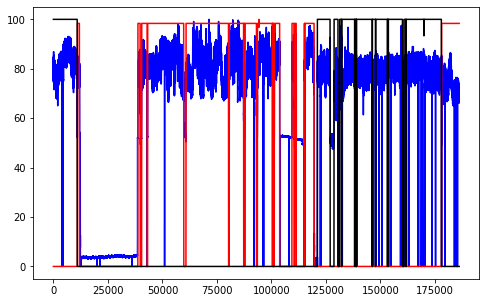

In [27]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# test_new = conversion_timestamp_to_unixtime(initial_dataframe)

In [28]:
test_new = spec_month

In [29]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID
test_new_1 = test_new

In [30]:
# test_new_2 = remove_rw_column_1(test_new_1,'RW')
test_new_2 = test_new_1

In [31]:
test_new_2.shape
# test_new_2.shape[0]

(80169, 4241)

In [32]:

# Taking define number of row from the beginning
# multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])
multivariate_data = alter_time(test_new_2, start_pos,test_new_2.shape[0])

In [33]:
multivariate_data.tail(2)

,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,year,month
1,2019-07-31 23:57:00,64.013841,7.504484,93.784840,19.853774,74.625144,98.569436,99.216861,21.500909,89.721406,...,49.626922,41.781509,81.060213,75.008290,66.232780,67.660478,0.708359,7.418061,2019,7
0,2019-07-31 23:58:00,63.552480,31.110530,94.307379,50.509217,74.625144,97.904214,98.714925,39.478675,90.185982,...,46.863453,41.806998,81.099474,74.344044,65.324862,66.765616,0.758311,8.607081,2019,7


In [34]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [35]:
rearranged_dataframe.head(2)

,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,year,AEWIHO_T9AV2
80168,2019-06-04 06:34:00,48.270051,100.0,89.700715,100.0,57.554787,86.057682,87.128839,99.909034,57.955865,...,41.594893,53.733961,73.763059,79.135119,68.769593,62.490511,3.278426,7.124723,2019,97.777036
80167,2019-06-04 06:35:00,48.270051,100.0,89.519719,100.0,57.554787,86.057682,87.128839,99.909034,57.955865,...,42.196272,53.802353,73.763059,79.403088,68.732111,62.226253,3.302313,6.854597,2019,97.902474


In [36]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (80169, 4241)
<class 'pandas.core.frame.DataFrame'> (80169, 4241)


In [37]:
dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [38]:
dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [39]:
dataframe_no_zero_value_target_column.shape

(58841, 4241)

In [ ]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [40]:
dataframe_no_zero_value_target_column.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
year                     int64
AEWIHO_T9AV2           float64
Length: 4241, dtype: object

In [41]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(80169, 4241)
(59144, 4241)
(58841, 4241)


In [42]:
dataframe_no_zero_value_target_column.tail(2)

,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,year,AEWIHO_T9AV2
18157,2019-07-19 09:15:00,59.688426,70.172478,88.715466,68.006771,76.528103,92.162235,95.120491,15.618732,86.295006,...,46.774916,47.392371,80.824063,81.847653,88.350402,55.090520,2.617515,48.097630,2019,63.512808
18156,2019-07-19 09:16:00,59.688426,54.774592,88.715466,48.591478,77.450826,92.665892,95.180212,15.756670,86.759582,...,43.723820,46.672498,80.923865,80.283099,86.142940,55.433963,2.661652,47.037114,2019,61.379442


In [45]:
# dataframe_no_zero_value_target_column_1 = dataframe_no_zero_value_target_column.reset_index()
# dataframe_no_zero_value_target_column_2 = dataframe_no_zero_value_target_column_1.drop(['index'], axis=1)
# print(dataframe_no_zero_value_target_column_2.shape)
# dataframe_no_zero_value_target_column_2.head(2)
def dataframe_reset_index(dataframe):
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(['index'], axis=1)
    
    return dataframe

dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
print(dataframe_no_zero_value_target_column_2.shape)

(58841, 4241)


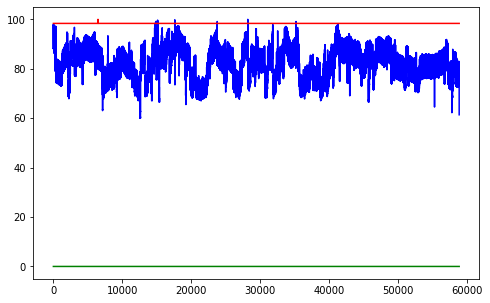

In [46]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [47]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [48]:
initial_dataframe = None
date_df = None
specific_month_df = None
spec_month = None
rearranged_dataframe = None
multivariate_data = None
dataframe_no_zero_value_blast_furnace = None
dataframe_no_zero_value_target_column = None

In [49]:
nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [38]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [51]:
print(type(dataframe_drop_column_with_same_value))
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
dataframe_drop_column_with_same_value.tail(1)

<class 'pandas.core.frame.DataFrame'>
(58841, 2852)
(58841, 4241)


,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
58840,2019-07-19 09:16:00,59.688426,54.774592,88.715466,48.591478,77.450826,92.665892,95.180212,15.75667,86.759582,...,81.386965,43.72382,46.672498,80.923865,80.283099,86.14294,55.433963,2.661652,47.037114,61.379442


In [52]:
dataframe_drop_column_with_same_value.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2852, dtype: object

In [39]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [40]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [53]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [54]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2852, dtype: object

In [ ]:
# def remove_rw_column_1(dataframe,req_string):
#     print(req_string)
#     new_variable = []
#     for i in dataframe:
#         x = i[:2]
#         if x != req_string:
#             new_variable = np.append(new_variable, i)
    
#     dataframe = dataframe.iloc[:][new_variable]
#     return dataframe

In [ ]:
# no_DE = remove_rw_column_1(dataframe_no_string,'DE')

In [ ]:
# no_CW = remove_rw_column_1(no_DE,'CW')

In [ ]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

In [55]:
print(dataframe_no_string.shape)
# print(no_DE.shape)
# print(no_CW.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)

(58841, 2852)


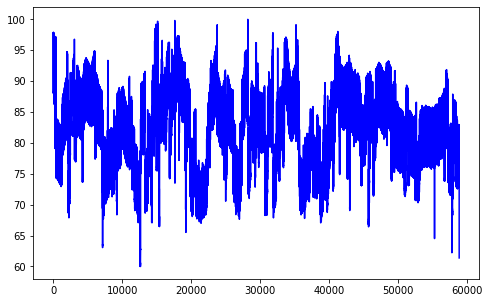

In [56]:
plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [57]:
# Make dataframe with dateTime index
def dataframe_datetime(dataframe):
    dataframe_datetime = dataframe.set_index('dateTime')
    return dataframe_datetime

dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [46]:
# dataframe_datetime = dataframe_datetime.drop(['longTime'], axis = 1)

In [58]:
dataframe_datetime.shape

(58841, 2851)

In [59]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [60]:
dataframe_drop_column_with_same_value = None

In [61]:
# feature selection with Pearson Correlation.
sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [ ]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')

In [ ]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')

In [62]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [63]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(58841, 33)


,RWDAHOAG9_V0,AEDAHO_T9_V2,AEELHOATURE0,AEELHOA_MWE0,ZEELHOAERZE0,AEHGHOAKOPP0,AEHGHOA_DPP0,AEHGHOASTRP1,RWHGHOAERZV0,RWHGHOASTRP1,...,AEWIHOAVABV2,AEWIHOAK__V0,AEWIHOAM__P0,AEWIHOAK__P0,AEWIHOAK__V9,AEWIHOAK__T0,AEWIHOAKVSV0,RWWIHOAT9_V0,RWWIHOT9_RV0,AEWIHO_T9AV2
count,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,...,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000,58841.000000
mean,71.697911,71.734582,68.689839,69.478525,69.475254,79.435338,76.520298,80.678256,82.446266,80.723303,...,85.595384,86.794746,82.780168,84.106943,86.376821,81.580664,85.900246,85.442881,45.385023,78.901591
std,9.180916,9.030748,15.967580,16.011569,16.207368,7.819239,9.008173,7.747726,11.705185,7.876401,...,7.834392,8.739890,8.420964,8.007253,8.723980,5.225395,7.867885,8.784148,3.539533,5.903122
min,0.000000,0.000000,0.039715,0.004933,0.000000,0.051969,0.000000,1.038962,0.017182,1.013602,...,0.034464,0.107389,0.000000,3.212266,0.000000,45.409474,0.055331,0.000000,0.000000,60.002719
25%,65.377116,65.395525,62.591430,63.611403,63.095238,75.291453,71.174509,76.935001,77.699928,76.976506,...,80.467469,81.411190,78.339686,79.467079,81.000328,78.139289,80.728725,80.448689,43.576796,74.582827
50%,72.642832,72.649208,72.877711,73.677795,73.809523,80.581747,78.385290,81.662702,85.646712,81.728304,...,87.841996,89.561263,84.713643,86.053282,89.137867,81.597057,88.155220,87.848875,45.248262,79.236685
75%,78.072847,78.072629,78.563630,79.262616,79.400527,84.648557,82.531797,85.974267,89.584670,86.060613,...,91.750805,93.226409,88.765667,90.217929,92.786557,84.890589,92.091743,91.757629,46.895809,82.757896
max,99.702524,99.735754,97.322522,97.747507,100.000000,95.368841,100.000000,96.472515,99.542978,96.508896,...,100.000000,98.159218,100.000000,100.000000,97.892359,98.270681,100.000000,100.000000,96.922132,100.000000


In [65]:
dataframe_high_correlation.tail(2)

,RWDAHOAG9_V0,AEDAHO_T9_V2,AEELHOATURE0,AEELHOA_MWE0,ZEELHOAERZE0,AEHGHOAKOPP0,AEHGHOA_DPP0,AEHGHOASTRP1,RWHGHOAERZV0,RWHGHOASTRP1,...,AEWIHOAVABV2,AEWIHOAK__V0,AEWIHOAM__P0,AEWIHOAK__P0,AEWIHOAK__V9,AEWIHOAK__T0,AEWIHOAKVSV0,RWWIHOAT9_V0,RWWIHOT9_RV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-19 09:15:00,65.361648,65.373151,79.232171,79.581967,74.603173,82.699972,75.236412,81.506441,75.387338,79.352130,...,84.199994,84.337122,82.792326,83.922276,83.119797,80.568156,83.496855,0.0,47.392371,63.512808
2019-07-19 09:16:00,65.508016,65.504699,79.013736,75.376437,74.504501,82.527562,77.276173,82.441788,75.976935,81.606463,...,84.388189,84.320703,82.052372,83.922276,83.921418,80.568156,84.554810,0.0,46.672498,61.379442


In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [66]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(' has already created',final_directory)
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
 has already created /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder


In [67]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2019-09-17


In [68]:
dataframe_high_correlation.shape

(58841, 33)

In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [56]:
# def make_dataset(dataframe, required_number_of_test_data):
#     dataset = np.array(dataframe)
    
#     go_for_training = int(len(dataset)-required_number_of_test_data)
#     print('go_for_training: ', go_for_training)
#     print('required_number_of_test_data: ', required_number_of_test_data)
#     percentage = go_for_training/int(len(dataset))
#     print('percentage: ',percentage)
    
#     NumberOfElements = int(len(dataset) * percentage)
#     print('Number of Elements for training: ', NumberOfElements)
#     print('dataset length: ', len(dataset))

#     train_input = dataset[0:NumberOfElements, 0:-1]
#     print('train_input shape: ', train_input.shape)
#     train_output = dataset[0:NumberOfElements, -1]
#     print('train_output shape: ', train_output.shape)

#     test_input = dataset[NumberOfElements:len(dataset), 0:-1]
#     print('test_input shape: ', test_input.shape)
#     test_output = dataset[NumberOfElements:len(dataset), -1]
#     print('test_output shape: ', test_output.shape)

#     return train_input, train_output, test_input, test_output

In [99]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation,required_number_of_test_data)

test_input = test_input[0:400]
test_output = test_output[0:400]
print('here ip: ', test_input.shape)
print('here op: ', test_output.shape)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  58341
required_number_of_test_data:  500
percentage:  0.9915025237504461
Number of Elements for training:  58341
dataset length:  58841
train_input shape:  (58341, 32)
train_output shape:  (58341,)
test_input shape:  (500, 32)
test_output shape:  (500,)
here ip:  (400, 32)
here op:  (400,)


In [100]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


------- LinearRegression


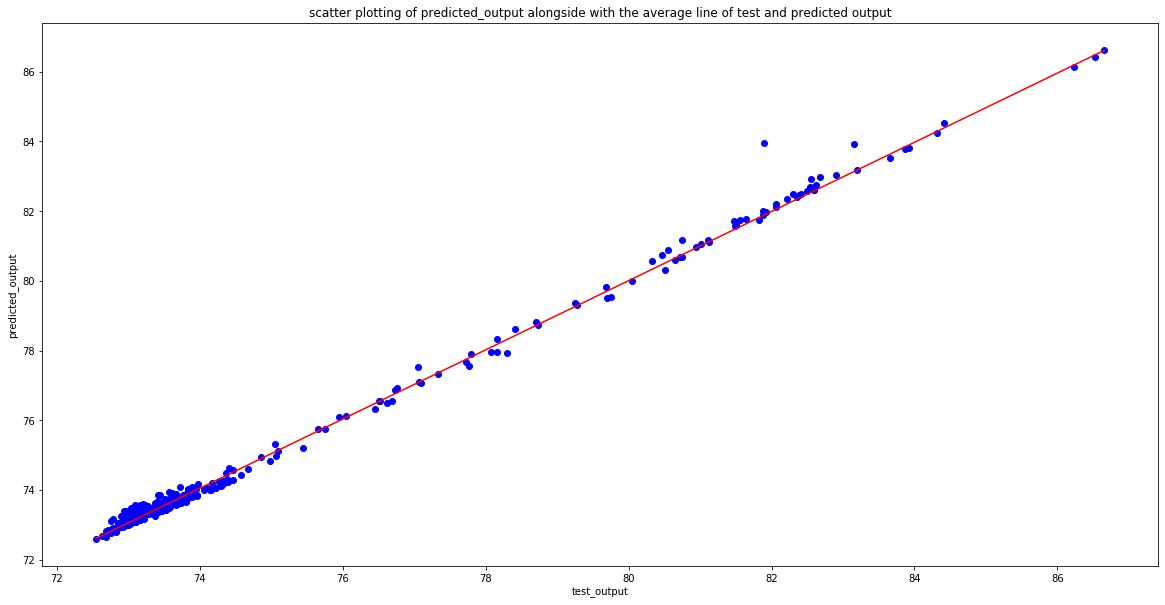

<class 'numpy.ndarray'>


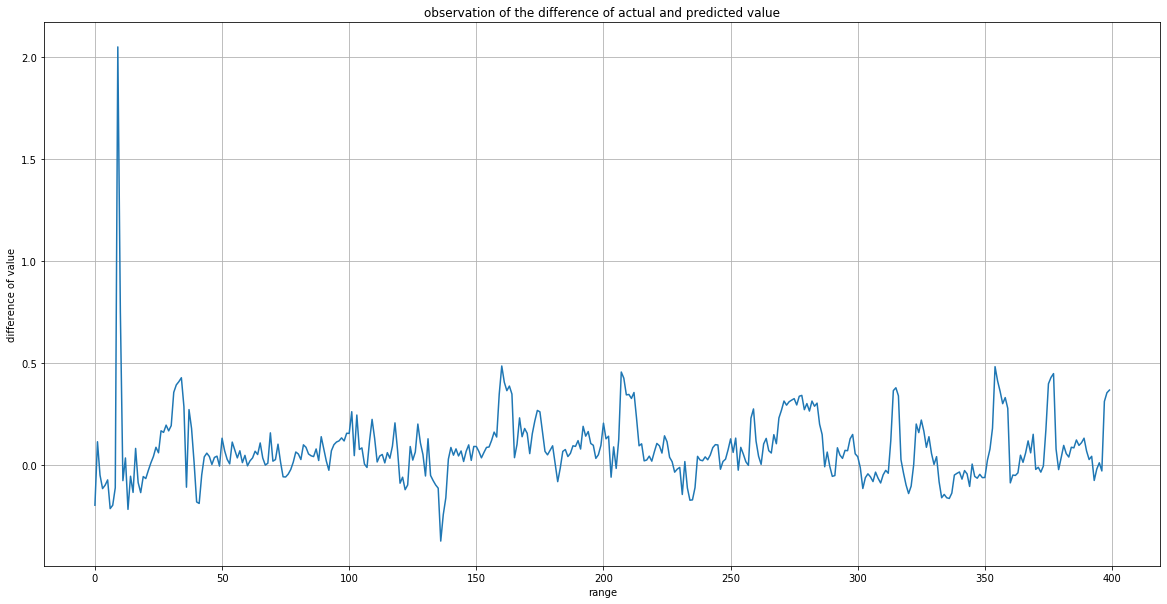

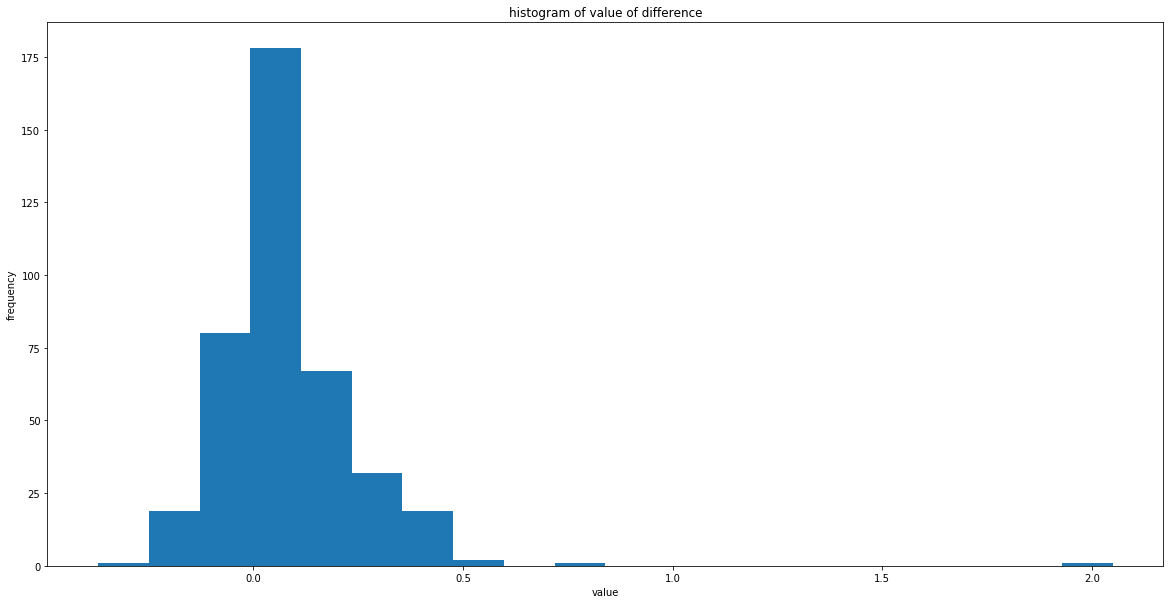

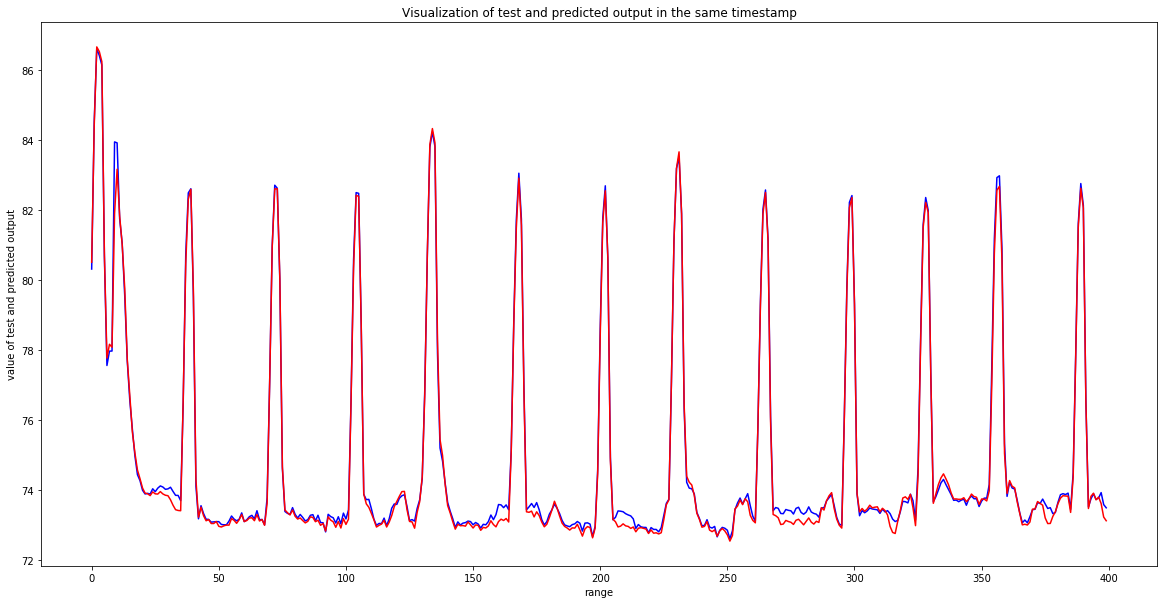

r_2 statistic: 1.00
Mean_absolute_error: 0.12
Mean squared error: 0.04
RMSE:  0.19190910537280878
!!!!---------------!!!!----------------!!!!
------- Lasso


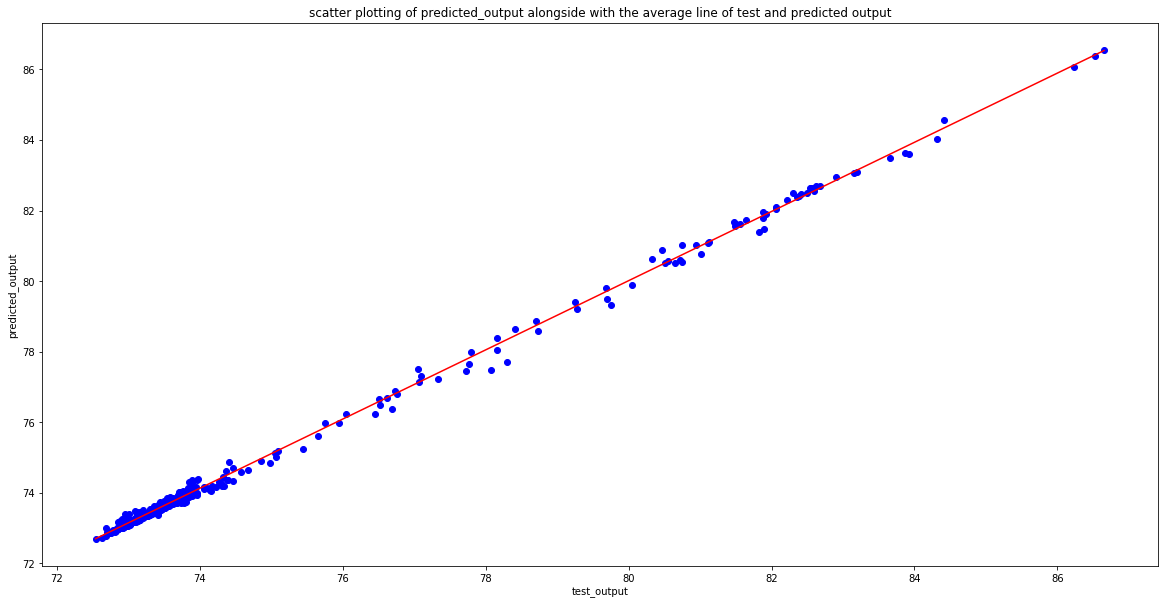

<class 'numpy.ndarray'>


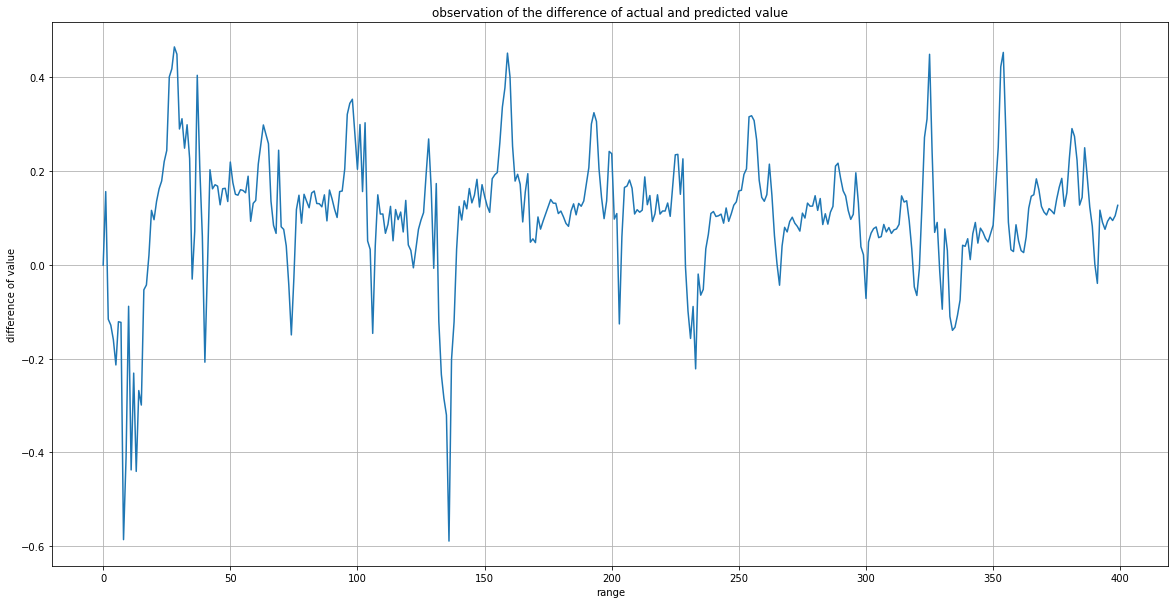

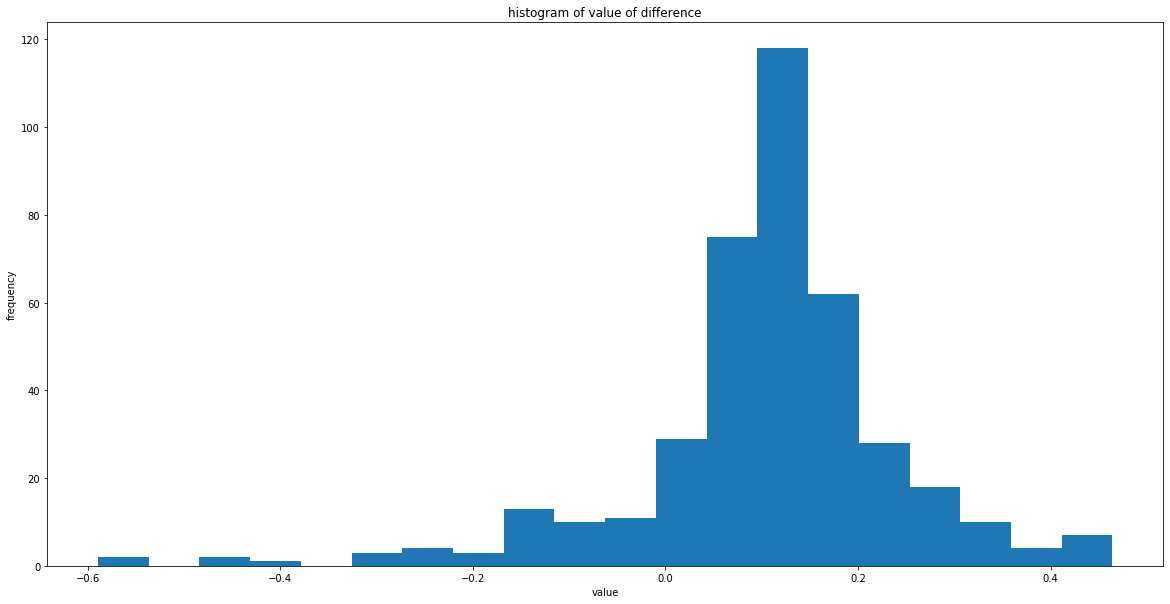

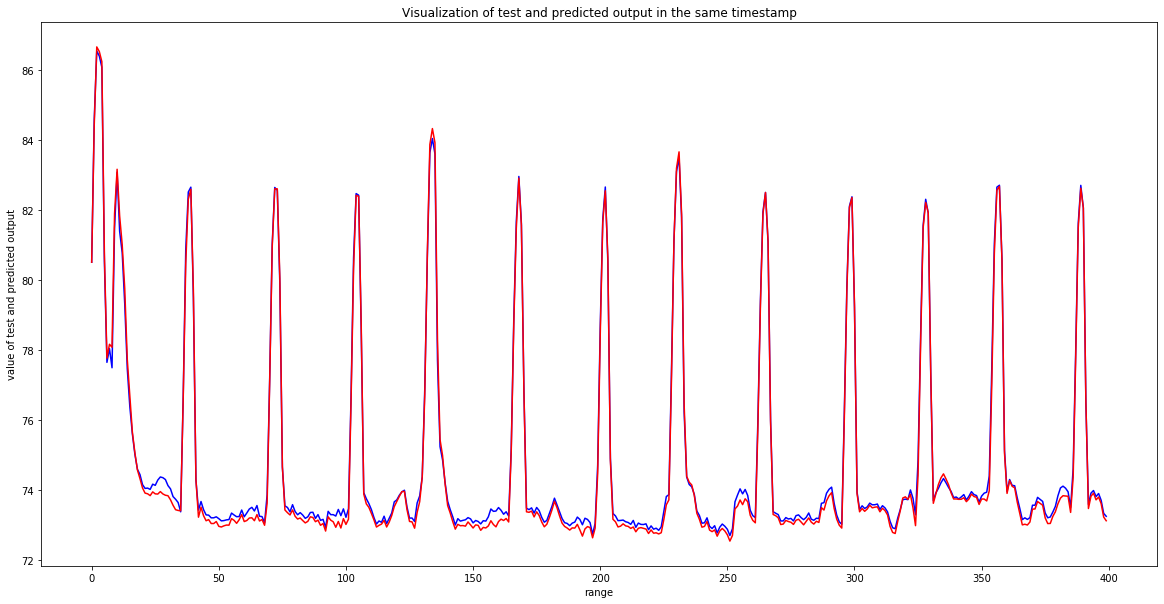

r_2 statistic: 1.00
Mean_absolute_error: 0.15
Mean squared error: 0.03
RMSE:  0.1742019815023385
!!!!---------------!!!!----------------!!!!
------- Ridge


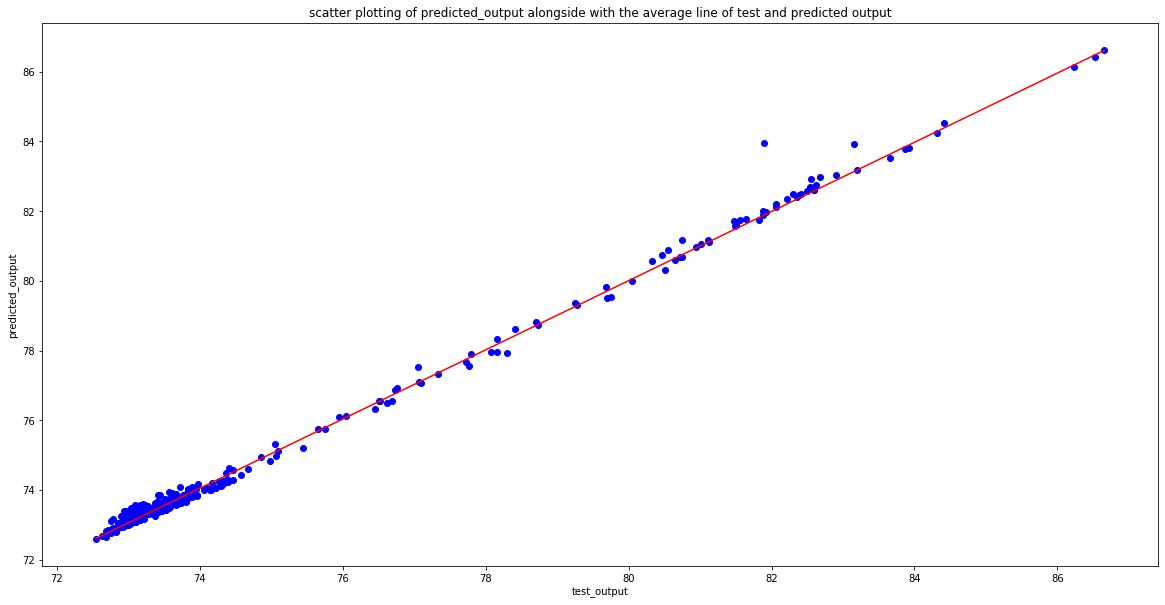

<class 'numpy.ndarray'>


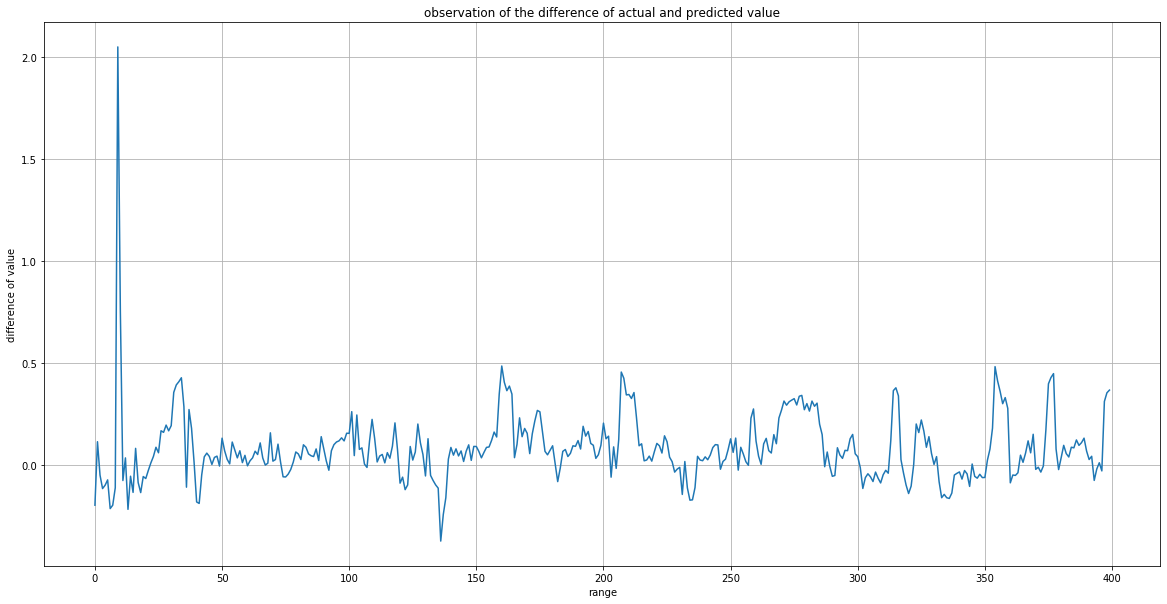

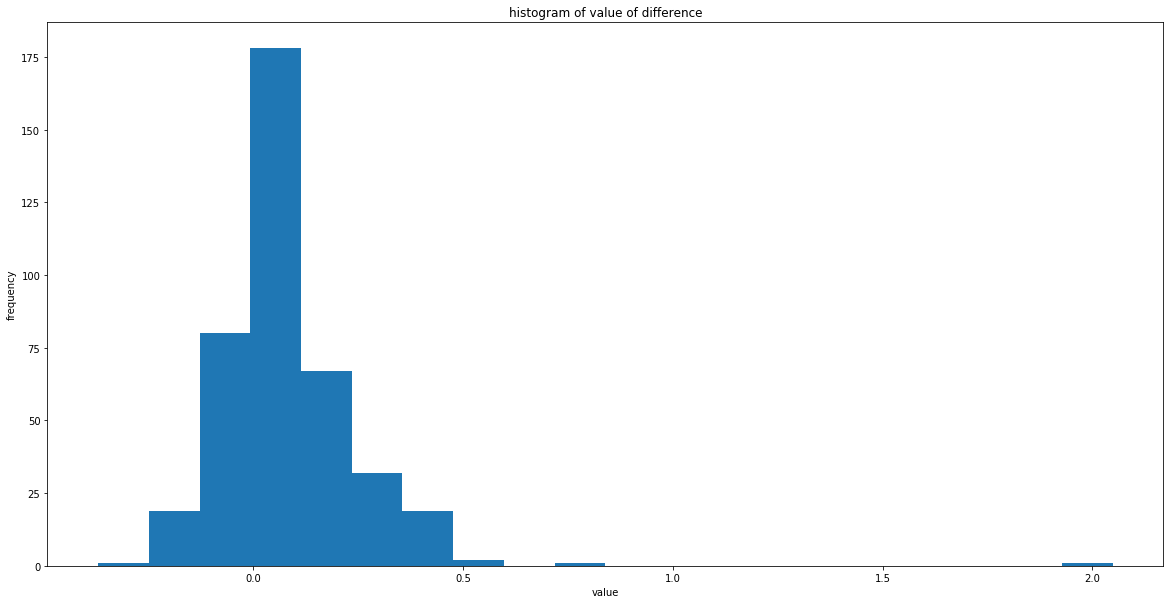

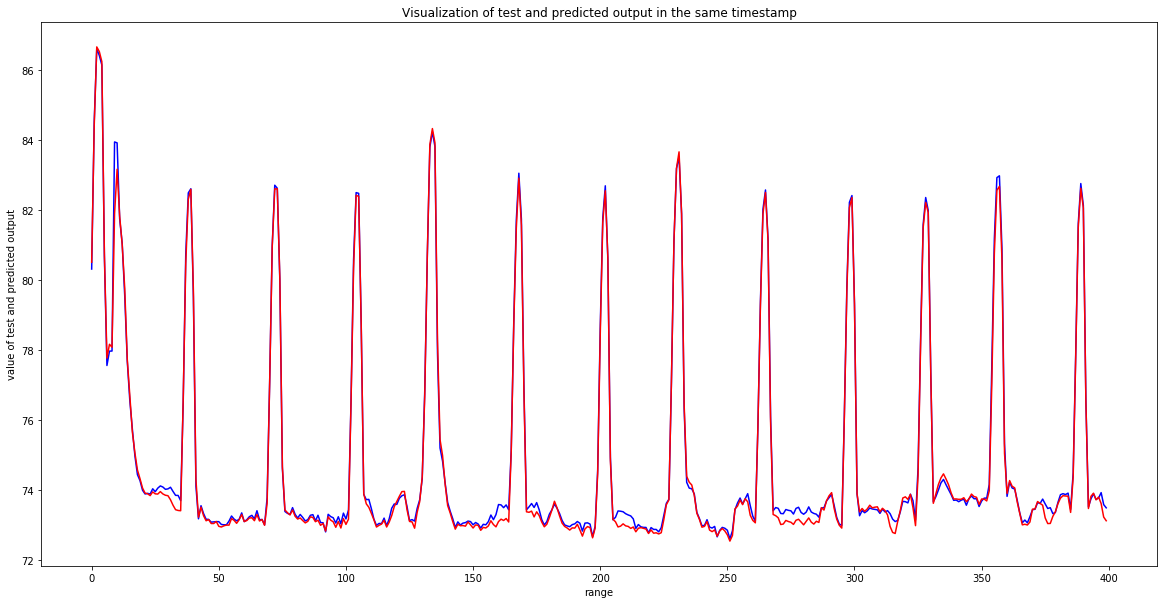

r_2 statistic: 1.00
Mean_absolute_error: 0.12
Mean squared error: 0.04
RMSE:  0.191774479153825
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


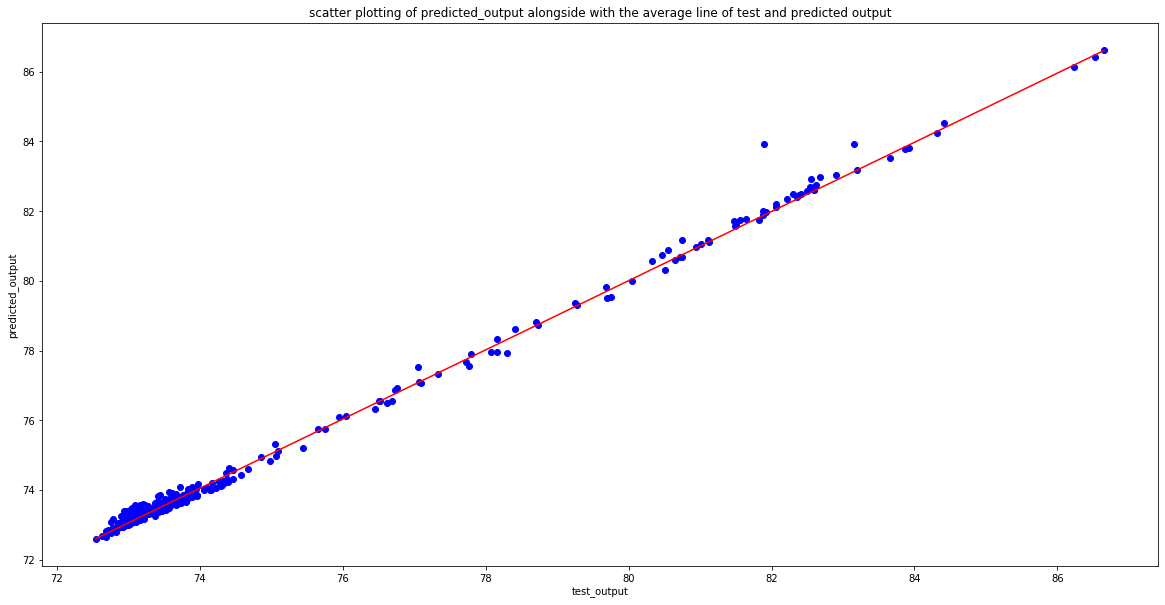

<class 'numpy.ndarray'>


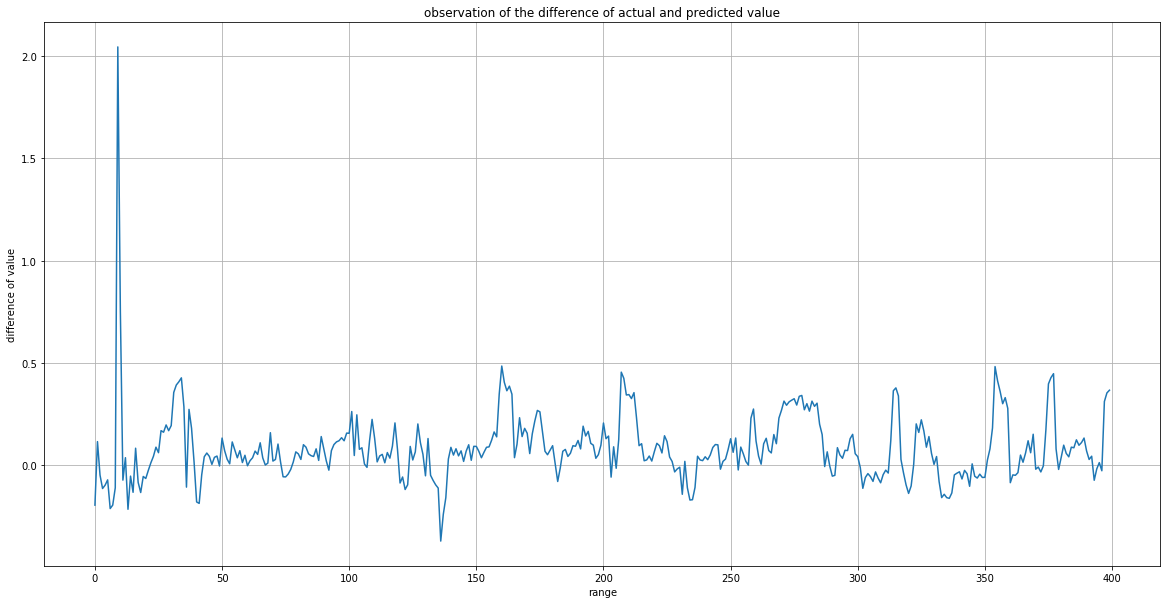

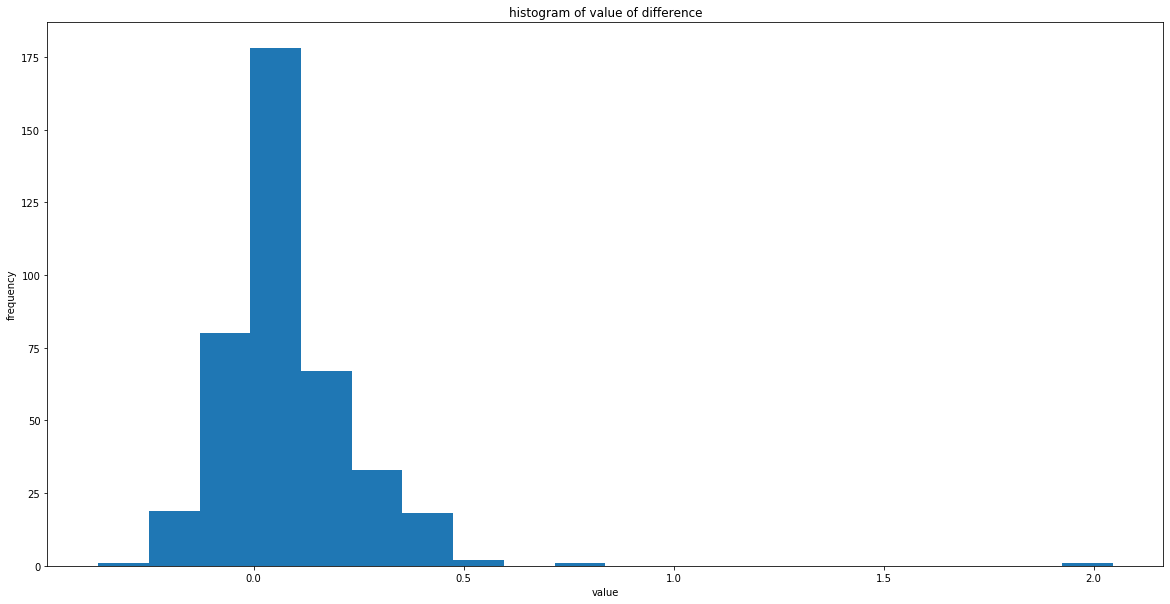

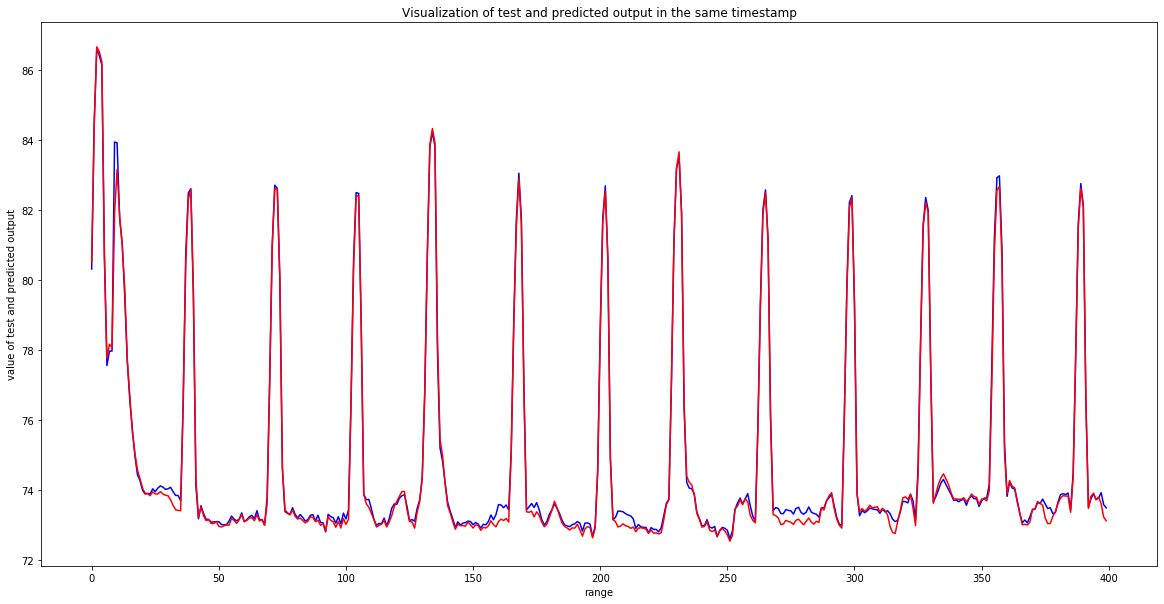

r_2 statistic: 1.00
Mean_absolute_error: 0.12
Mean squared error: 0.04
RMSE:  0.19133941368155274
!!!!---------------!!!!----------------!!!!
------- tree


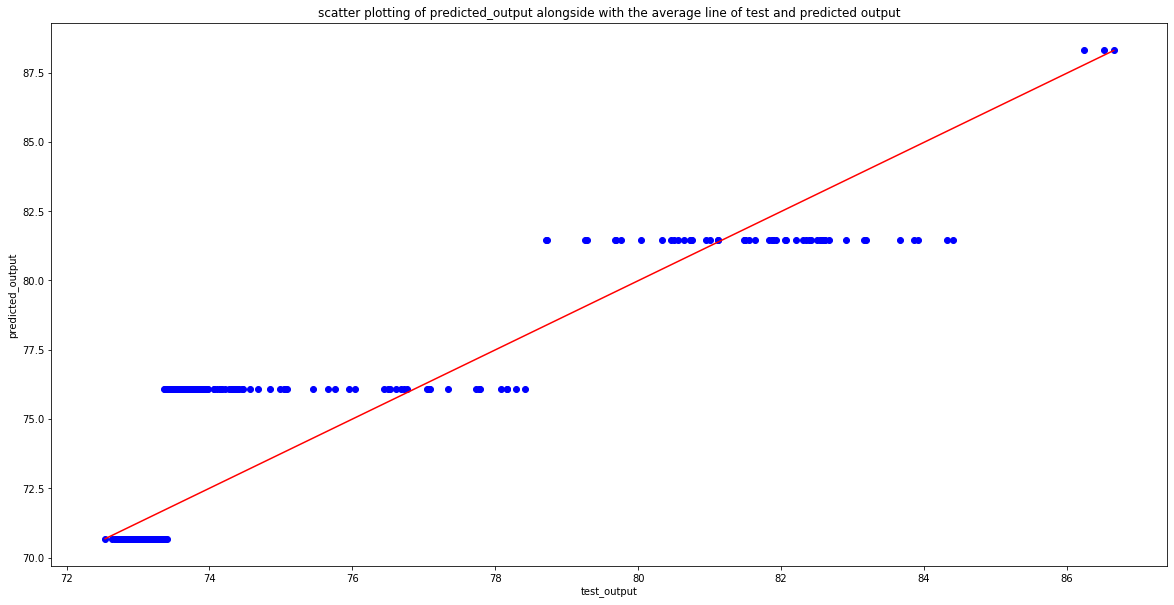

<class 'numpy.ndarray'>


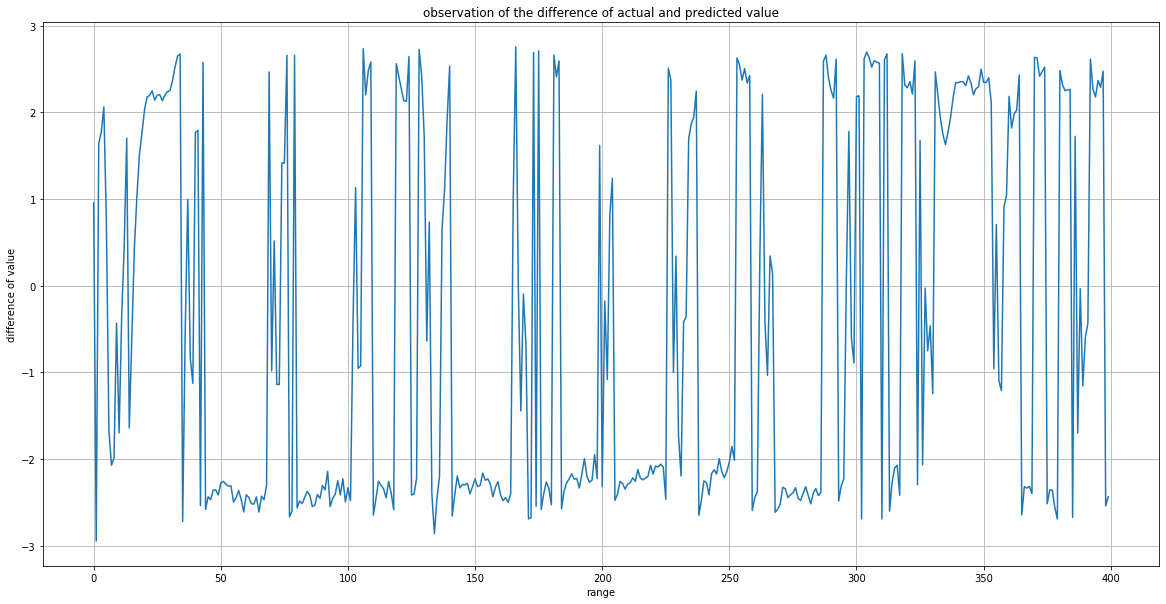

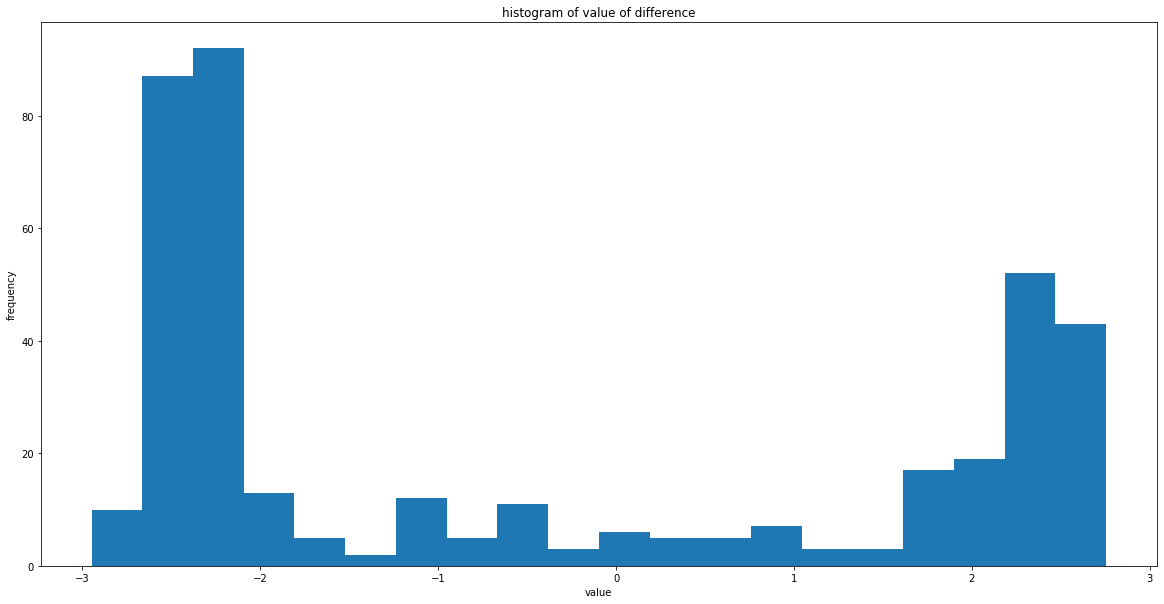

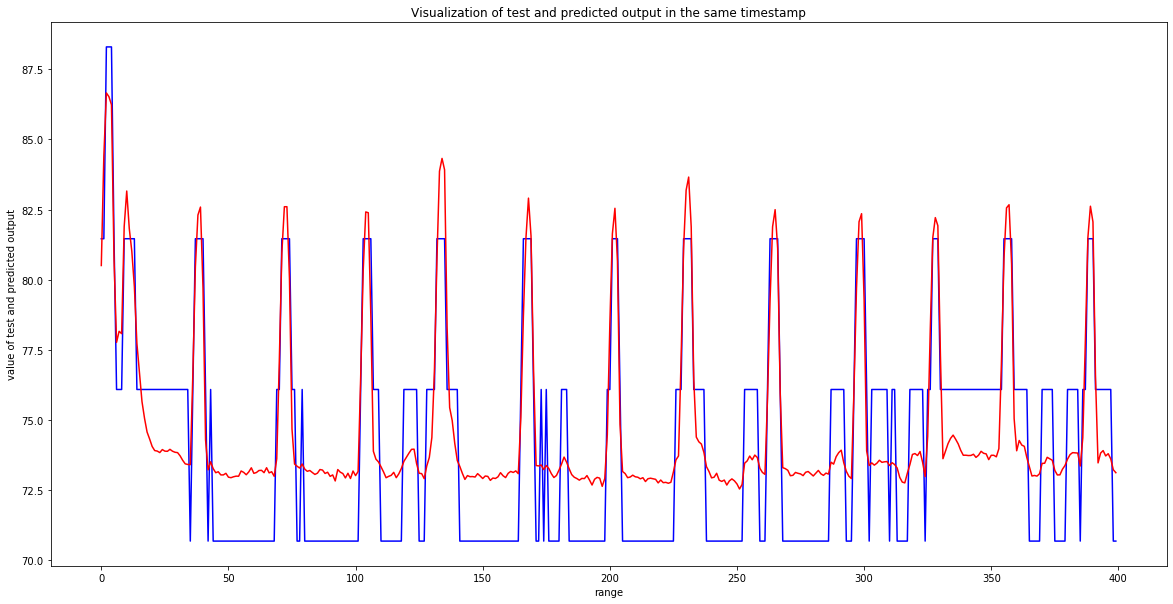

r_2 statistic: 0.51
Mean_absolute_error: 2.09
Mean squared error: 4.75
RMSE:  2.180232969137638
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


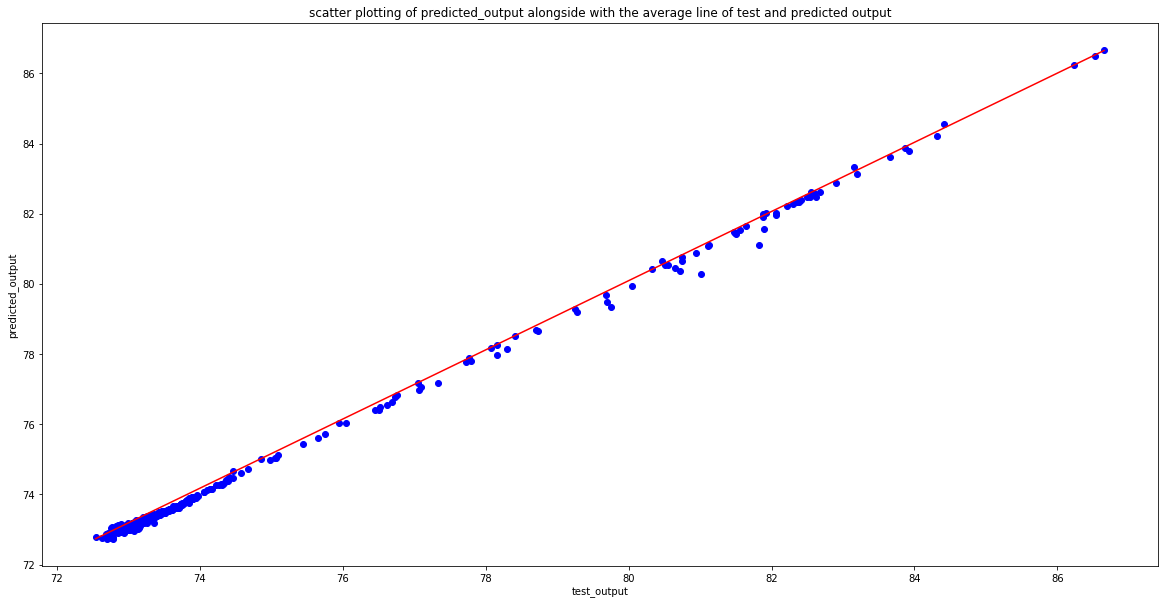

<class 'numpy.ndarray'>


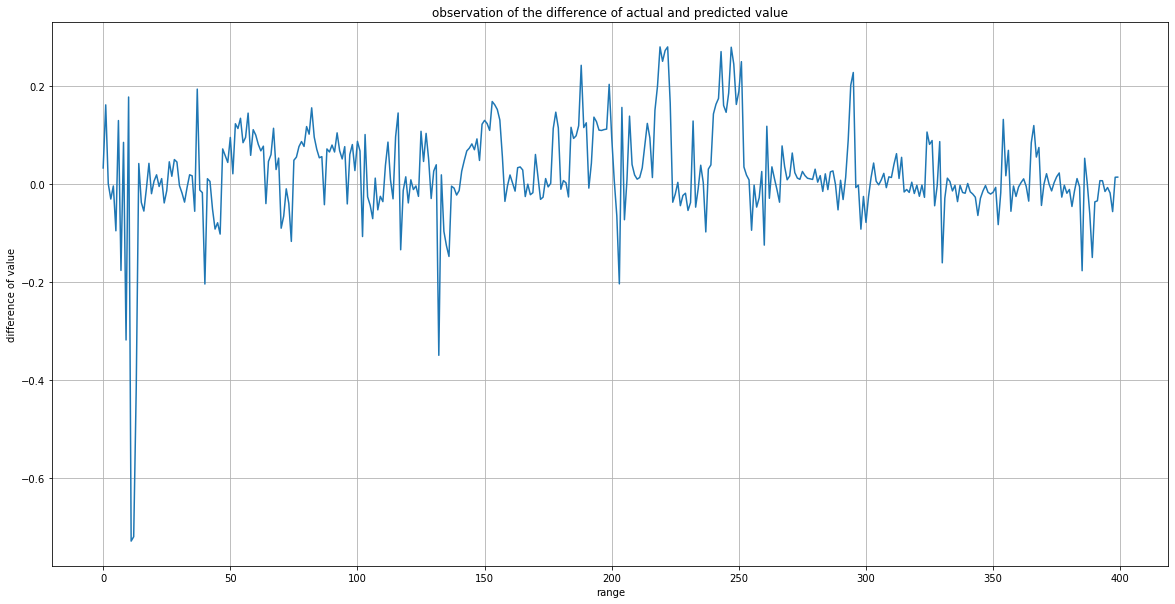

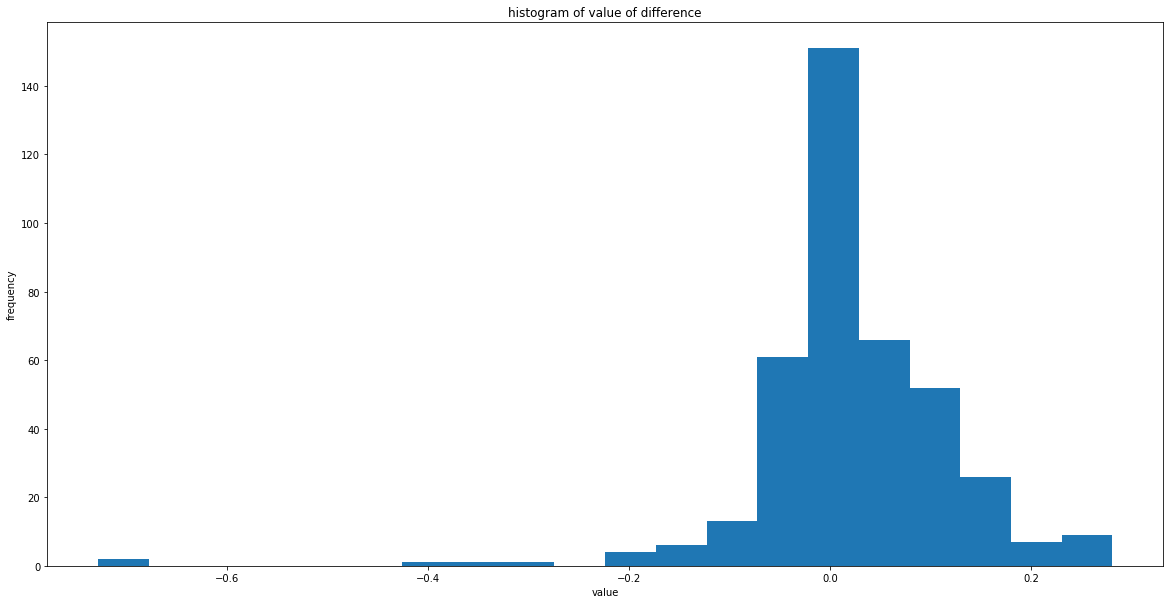

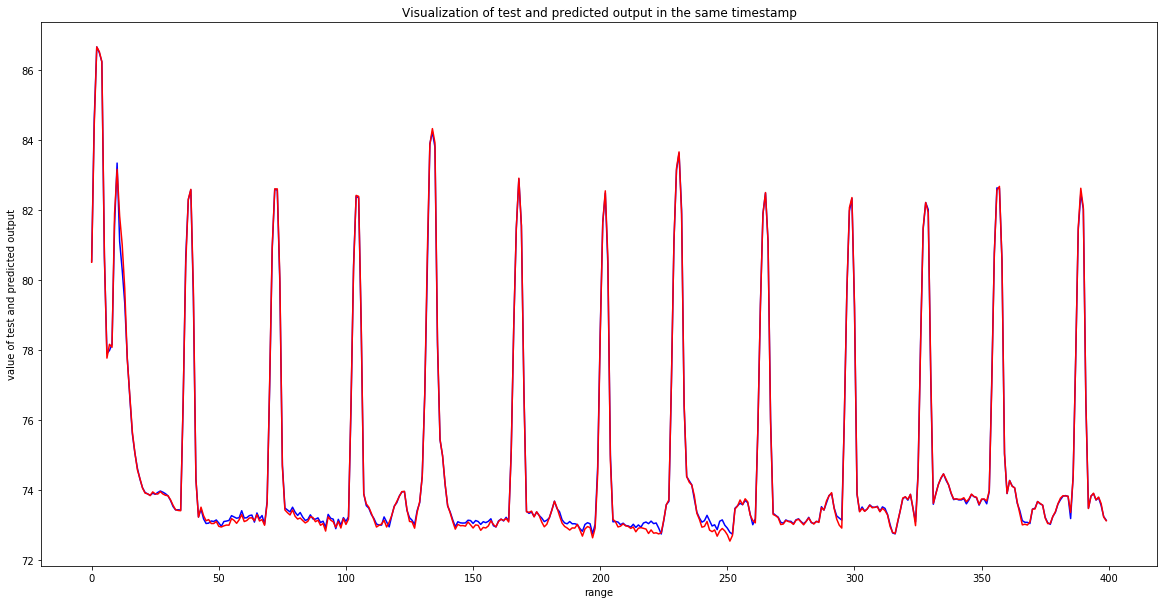

r_2 statistic: 1.00
Mean_absolute_error: 0.07
Mean squared error: 0.01
RMSE:  0.10283719505768363
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

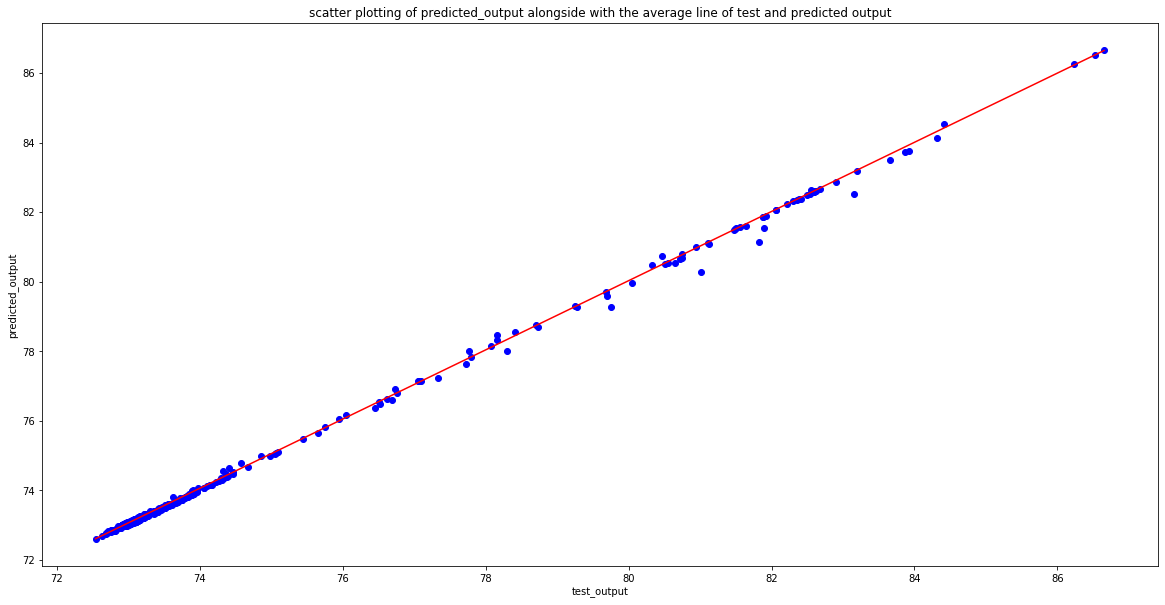

<class 'numpy.ndarray'>


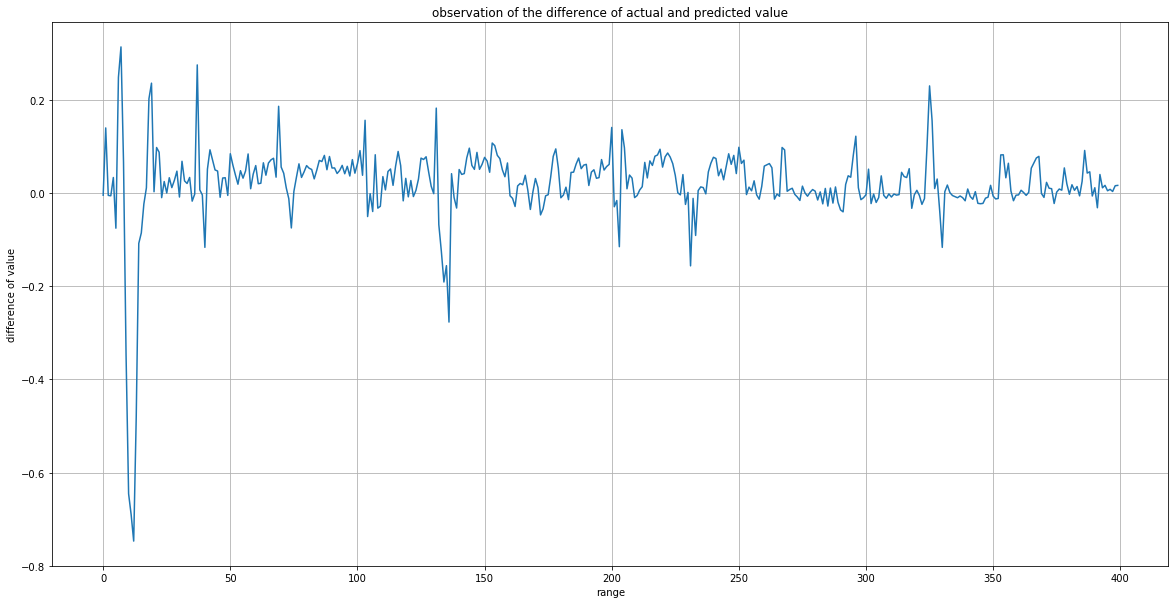

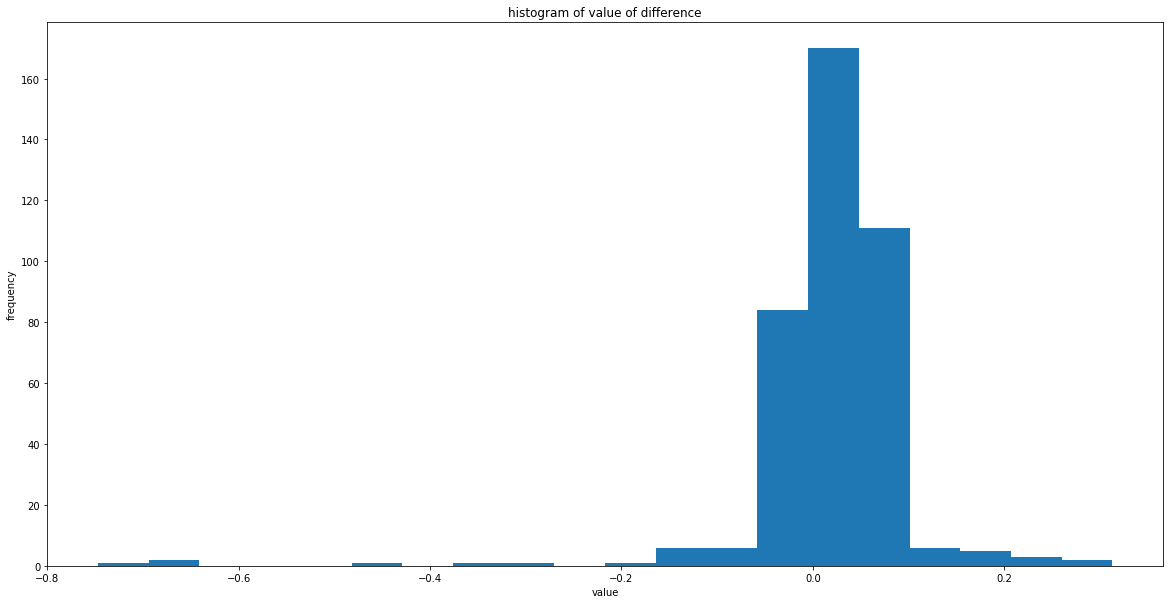

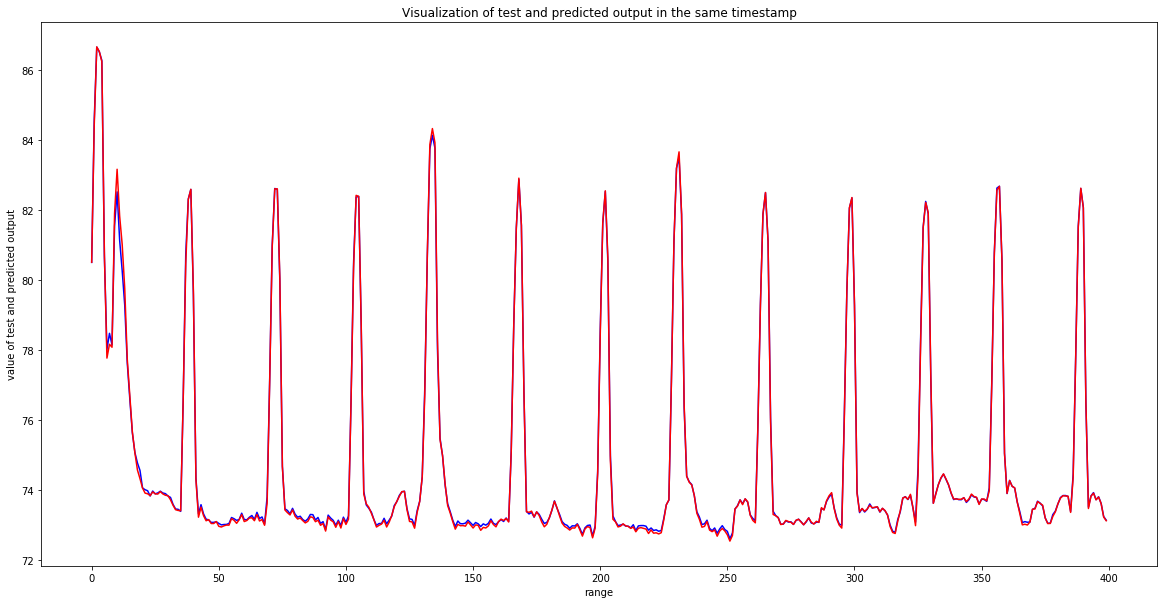

r_2 statistic: 1.00
Mean_absolute_error: 0.05
Mean squared error: 0.01
RMSE:  0.09141562716463254
!!!!---------------!!!!----------------!!!!
------- GBR


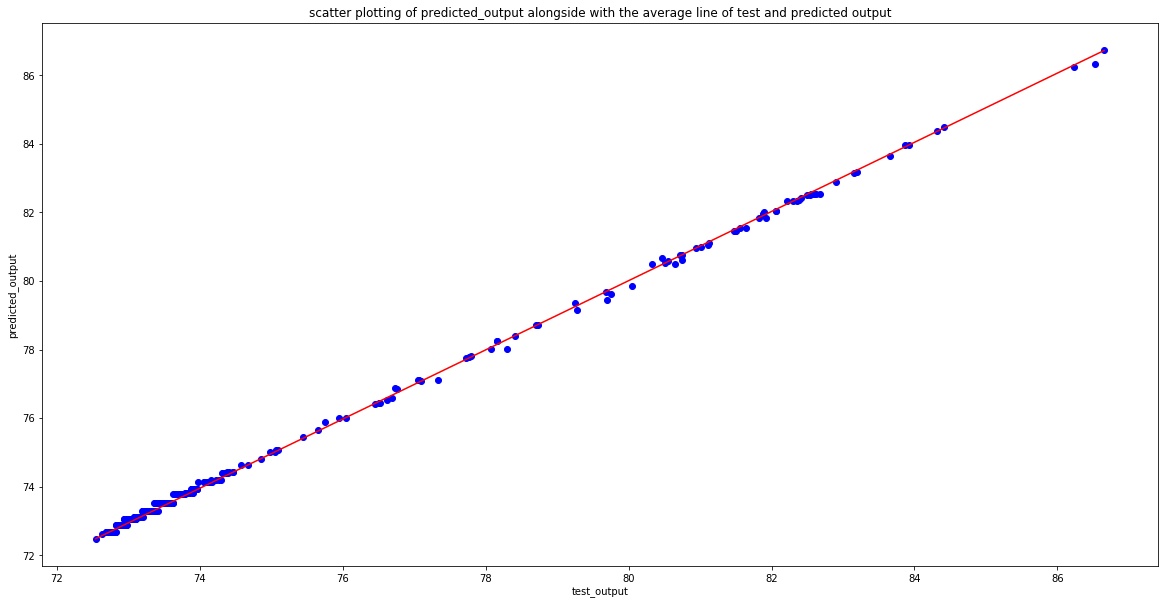

<class 'numpy.ndarray'>


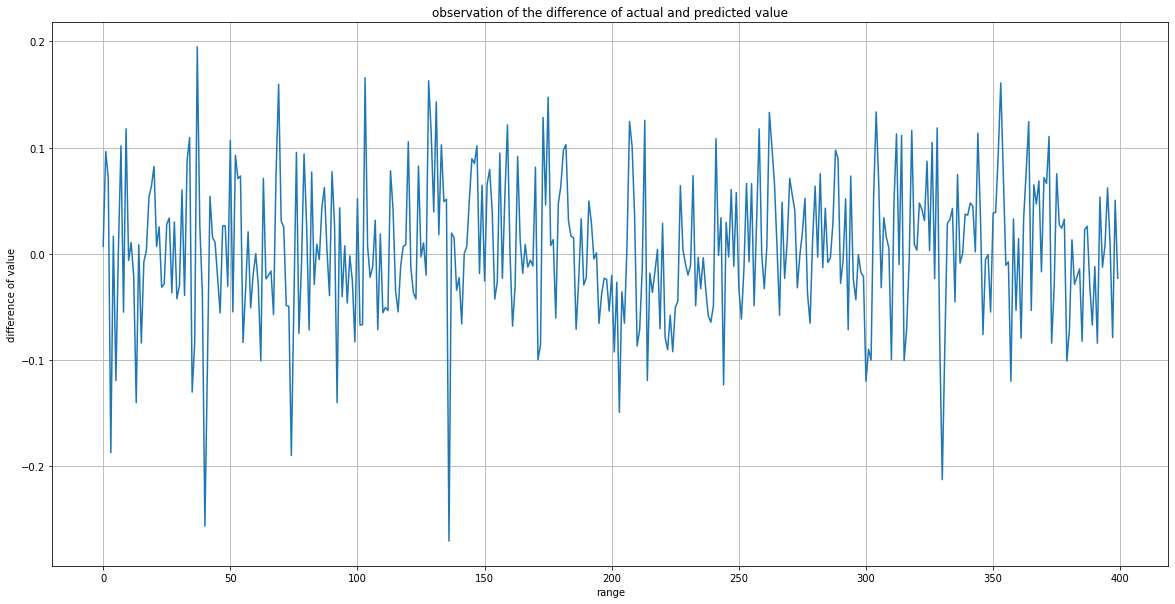

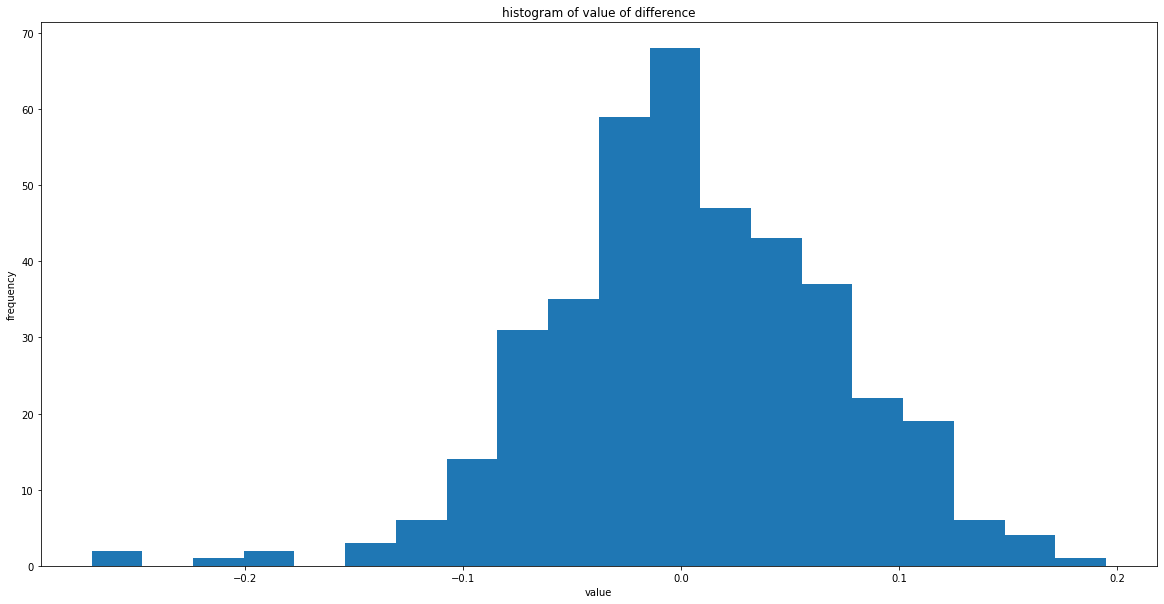

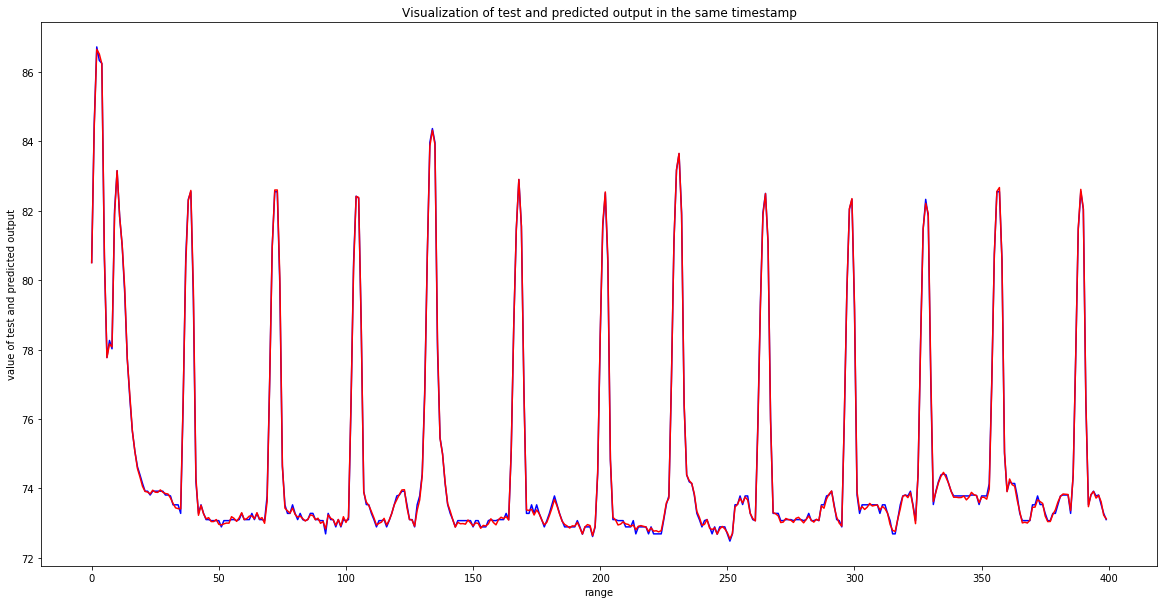

r_2 statistic: 1.00
Mean_absolute_error: 0.05
Mean squared error: 0.00
RMSE:  0.06716011752148346
!!!!---------------!!!!----------------!!!!


In [101]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [ ]:
import sklearn

In [ ]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

In [ ]:
my_pred = my_model.predict(test_input)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

# Neural Network

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [75]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 169,089
Trainable params: 169,089
Non-trainable params: 0
_________________________________________________________________


In [76]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

W0917 21:48:52.033883 140169774753600 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0917 21:48:52.043620 140169774753600 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
58341/58341 [==============================] - 7s 115us/step - loss: 2.6068 - mean_absolute_error: 2.6068 - acc: 0.0000e+00
Epoch 2/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.5846 - mean_absolute_error: 1.5846 - acc: 0.0000e+00
Epoch 3/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.3501 - mean_absolute_error: 1.3501 - acc: 1.7141e-05
Epoch 4/30
58341/58341 [==============================] - 6s 108us/step - loss: 1.2702 - mean_absolute_error: 1.2702 - acc: 0.0000e+00
Epoch 5/30
58341/58341 [==============================] - 6s 110us/step - loss: 1.1777 - mean_absolute_error: 1.1777 - acc: 0.0000e+00
Epoch 6/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.1559 - mean_absolute_error: 1.1559 - acc: 0.0000e+00
Epoch 7/30
58341/58341 [==============================] - 6s 109us/step - loss: 0.9998 - mean_absolute_error: 0.9998 - acc: 0.0000e+00
Epoch 8/30
58341/58341 [==============================]

In [77]:
predicted_output_NN = NN_model.predict(test_input)

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 0.82
Mean_absolute_error: 1.06
Mean squared error: 1.77
RMSE:  1.3285846495454539


In [79]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(500, 1)

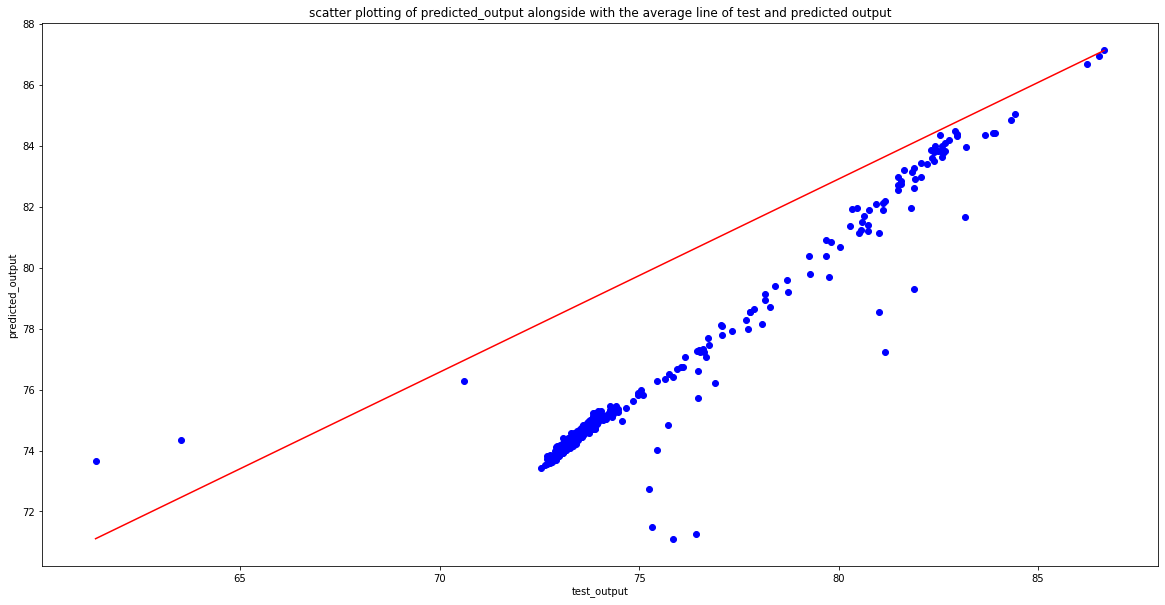

<class 'numpy.ndarray'>


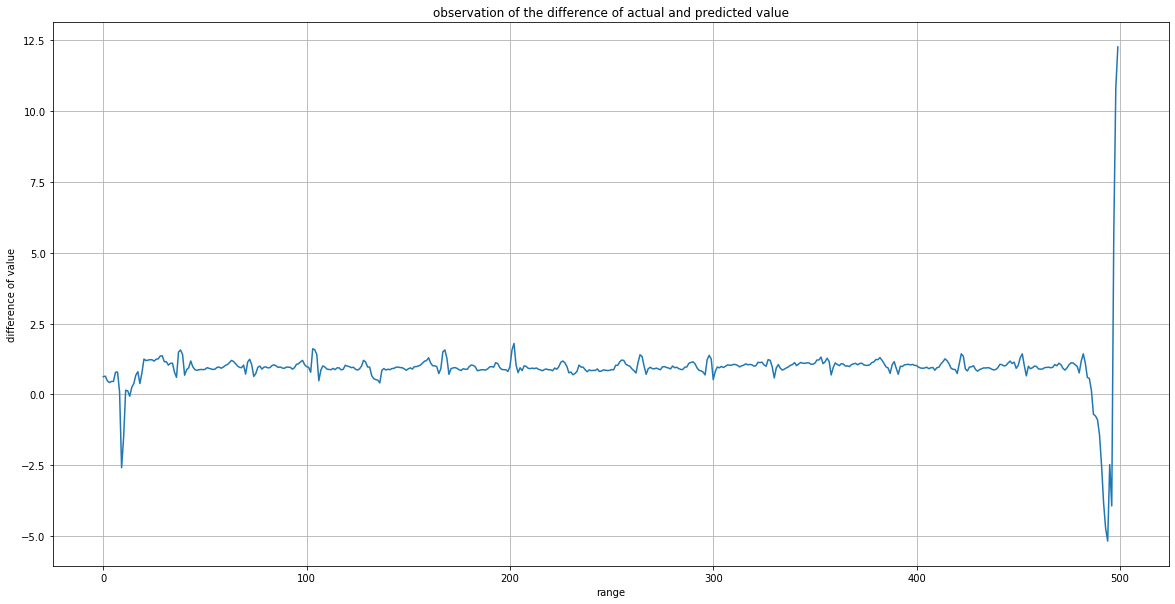

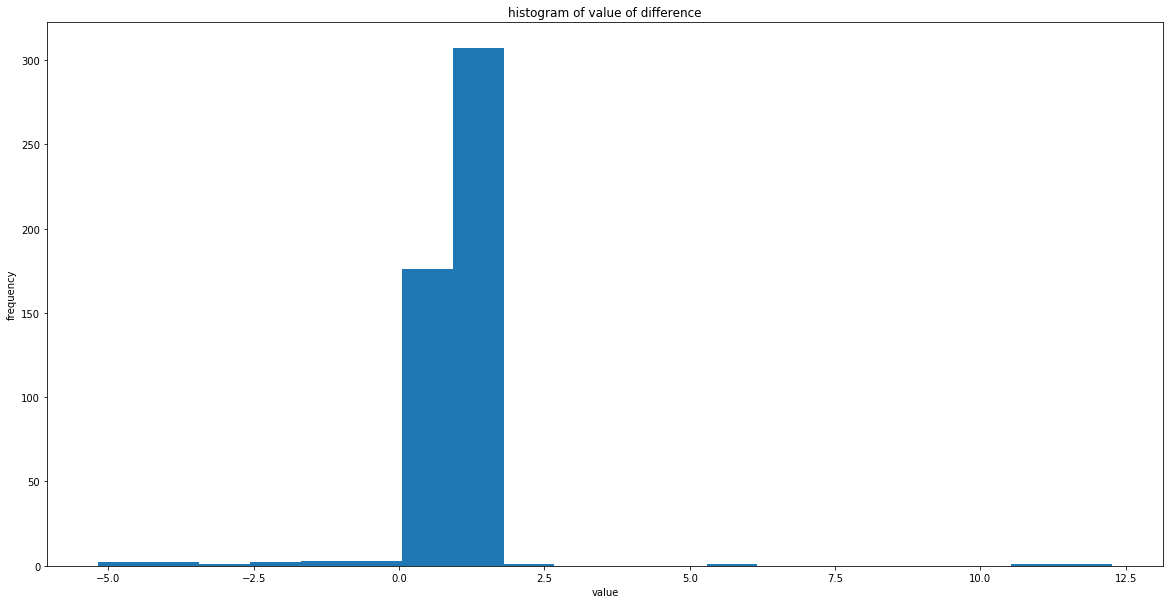

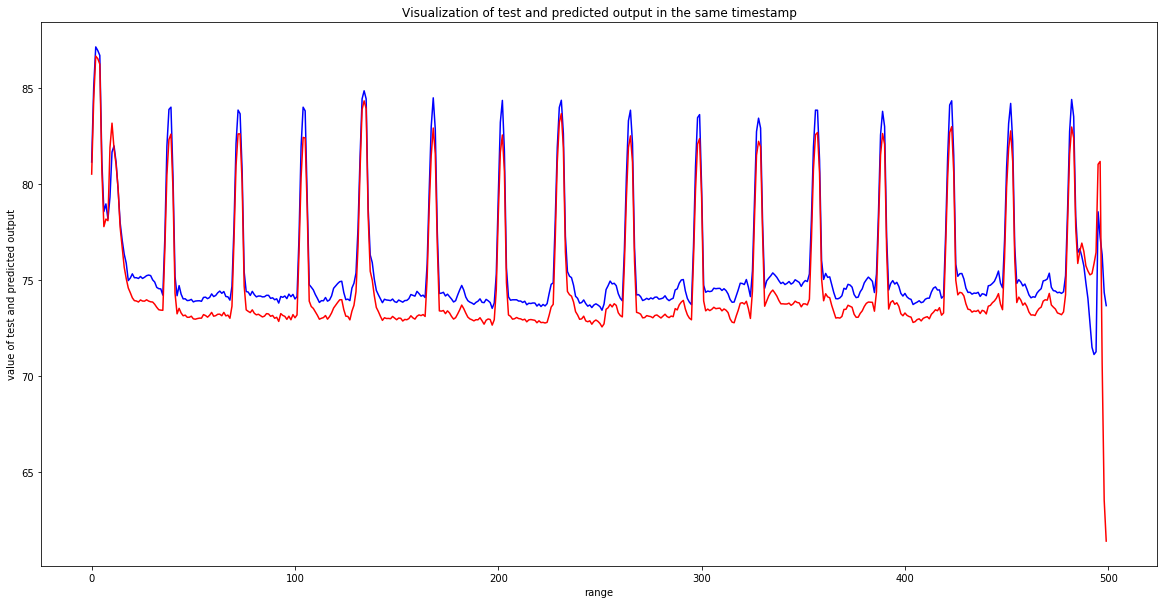

In [80]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [81]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 0.82
Mean_absolute_error: 1.06
Mean squared error: 1.77
RMSE:  1.3285846495454539
!!!!---------------!!!!----------------!!!!


# LSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import callbacks

In [ ]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.99)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data = dataset[0:NumberOfElements]
    multiple_ip_test_set = dataset[NumberOfElements:len(dataset)]
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(dataframe_high_correlation)

print('train_data_conv shape: ', multiple_ip_train_data.shape)
print('test_data_conv shape: ', multiple_ip_test_set.shape)

In [ ]:
 # split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 2
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, n_steps_1)

print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]

samples = X_Conv_Lstm.shape[0]
time = n_steps_1
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [ ]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

In [ ]:
# define model

# cbks = [callbacks.LearningRateScheduler(lambda x: 1. / (1. + x))]

lr = 0.01

def lr_schedule(epoch):
#     print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
#     print('now lr_1: ', lr_1)
    return lr_1

batch_size=32
epochs= 30
activation_function = 'relu'

In [ ]:
model = Sequential()
# n_seq, 1, n_steps_2, n_features
model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function), input_shape=(time,rows,cols,channels),return_sequences=False))
# model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

In [ ]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

In [ ]:
from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5')

yhat = model.predict(x_input, verbose=1)
# print(yhat)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(y_Conv_Lstm_test,yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_Conv_Lstm_test,yhat))
print("Mean squared error: %.2f" % mean_squared_error(y_Conv_Lstm_test,yhat))
RMSE=math.sqrt(mean_squared_error(y_Conv_Lstm_test,yhat))
print('RMSE: ',RMSE)

In [ ]:
# plt.plot((min(y_Conv_Lstm_test), max(y_Conv_Lstm_test)), (min(yhat), max(yhat)), color='red')
# plt.scatter(y_Conv_Lstm_test, yhat, color='blue')

In [ ]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

In [ ]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [ ]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

In [ ]:
dataframe_datetime.tail()

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)